
<figure>
<img src="/work/Modulo3_Caso4/fig/ISEADE LOGO Y ESCUDO.png" align="center"/> 
</figure> 

# Caso 4 - Machine Learnig y K-Medias

## 4.1. Problema de Negocio

Actualmente la empresa en la que se encuentra trabajando està teniendo un problema de retención de talento. Le ha sido asignada la tarea de entender este comportamiento y encontrar la razón por la cual las personas se van de la compañía.

## 4.2. Definiciones
### 4.2.1 Machine Learning
El aprendizaje automático es una clase de algoritmos computacionales que "aprende" iterativamente una aproximación a alguna función. Hay tres componentes que componen un algoritmo de aprendizaje automático: representación, evaluación y optimización.
La **representación** implica la transformación de entradas de un espacio a otro espacio más útil que puede interpretarse más fácilmente.
La **evaluación** es esencialmente la función de pérdida. ¿Con qué eficacia su algoritmo transformó sus datos en un espacio más útil?
La **optimización** es la última pieza del rompecabezas. Una vez que tenga el componente de evaluación, puede optimizar la función de representación para mejorar su métrica de evaluación.

https://towardsdatascience.com/no-machine-learning-is-not-just-glorified-statistics-26d3952234e3

### 4.2.2 Reconocimiento de Patrones

El reconocimiento de patrones es la búsqueda e identificación de patrones recurrentes con resultados aproximadamente similares.

https://towardsdatascience.com/comparing-coffee-using-pattern-recognition-35b92cca4502

https://towardsdatascience.com/technical-pattern-recognition-for-trading-in-python-63770aab422f

### 4.2.2 Minería de datos

Al recopilar e inspeccionar  datos, las personas pudieron descubrir algunos patrones. Incluso todo el conjunto de datos es basura, hay algunos patrones ocultos que se pueden extraer combinando múltiples fuentes de datos para proporcionar información valiosa.

https://towardsdatascience.com/data-mining-in-brief-26483437f178

https://towardsdatascience.com/your-ultimate-data-mining-machine-learning-cheat-sheet-9fce3fa16


## 4.3. Importación de Módulos

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, OrdinalEncoder

## 4.4. Importación de Datos

La información fue descargada de un conjunto de datos disponible en [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). Estos datos son tabulares, y se encuentran en formato .csv. Por lo tanto pueden ser cargadas como una tabla en python. Esto puede ser realizado por medio de un DataFrame de pandas. 

In [ ]:
df_HR = pd.read_csv('/work/Modulo3_Caso4/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 4.5. Análisis Exploratorio de datos

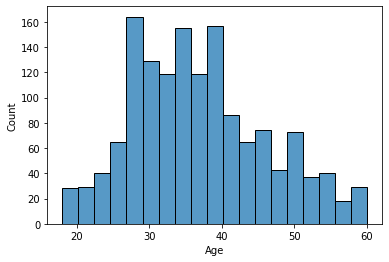

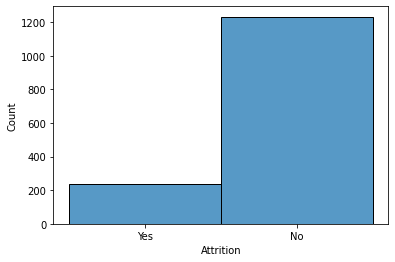

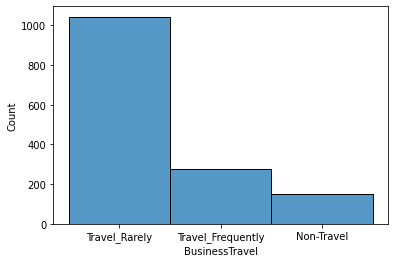

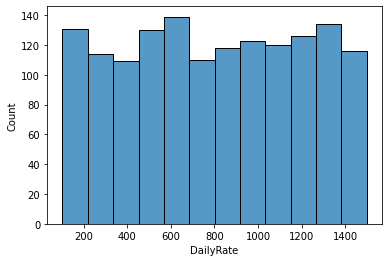

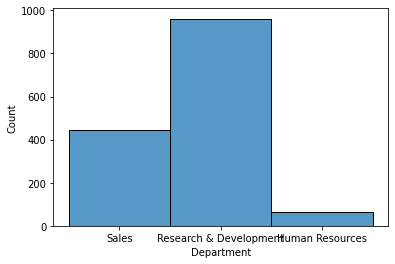

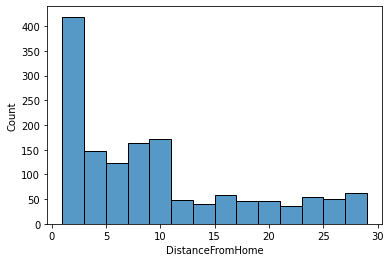

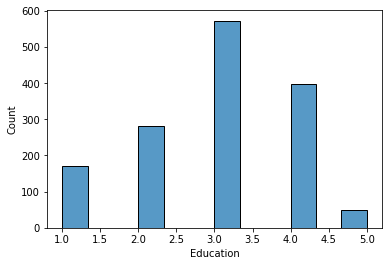

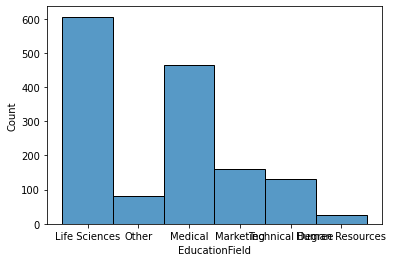

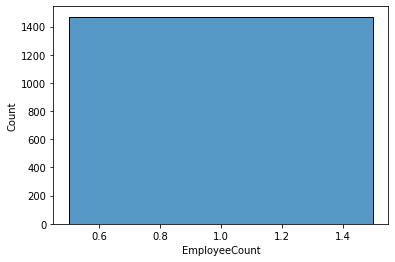

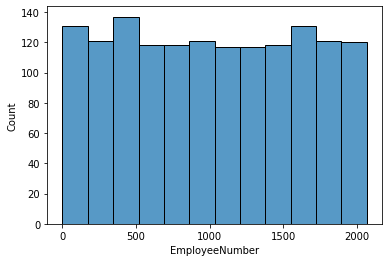

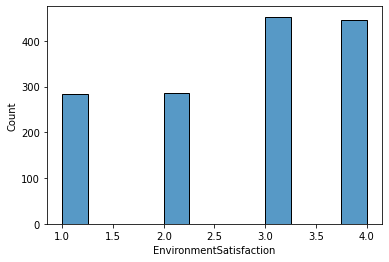

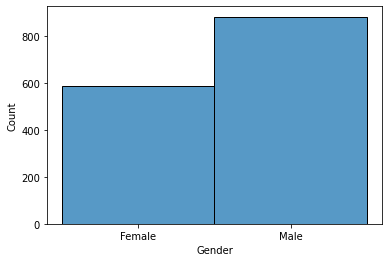

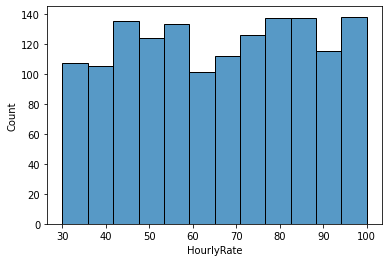

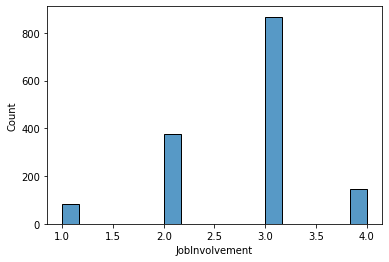

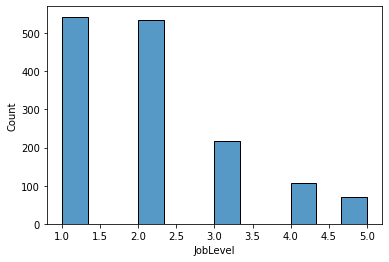

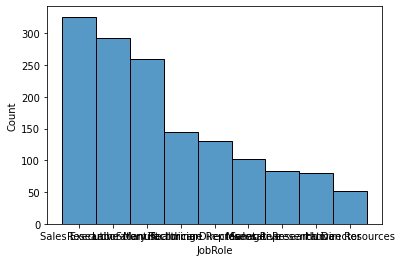

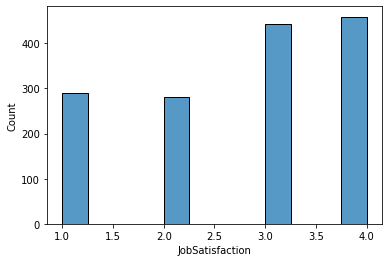

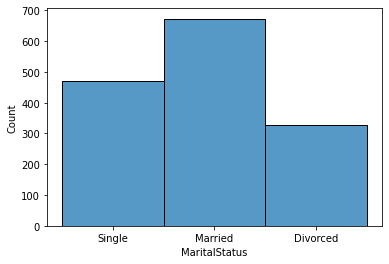

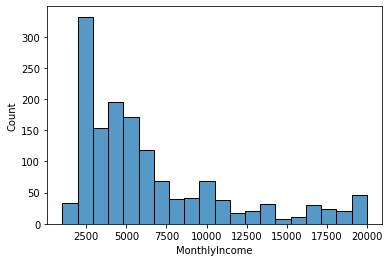

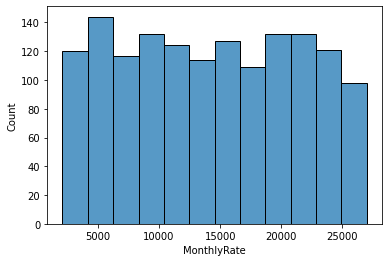

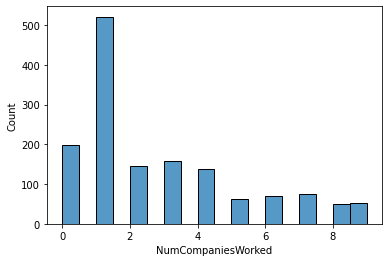

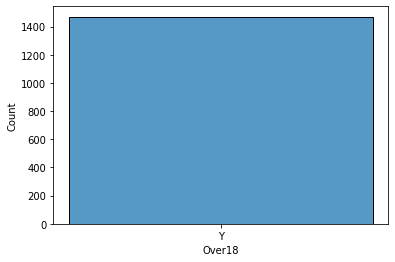

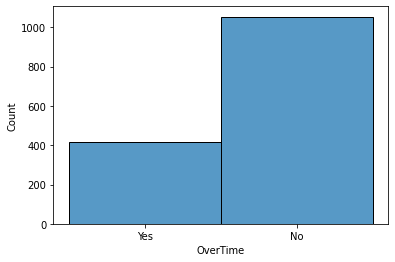

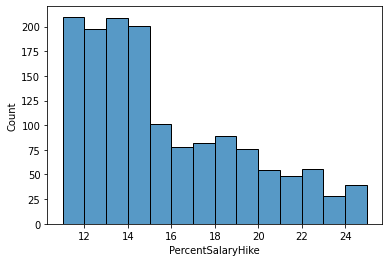

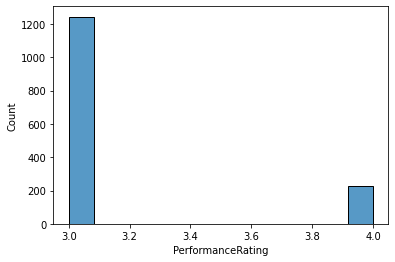

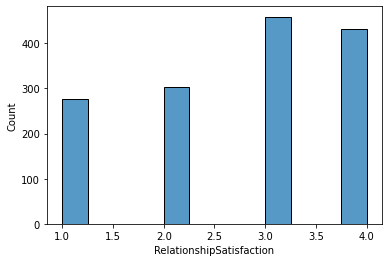

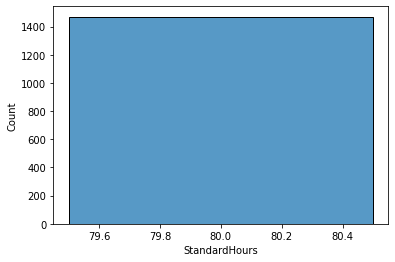

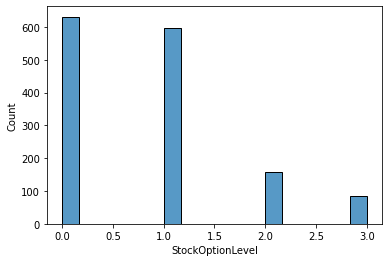

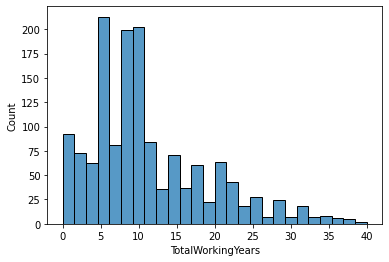

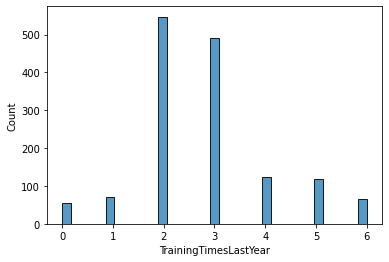

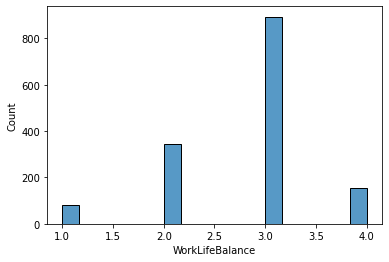

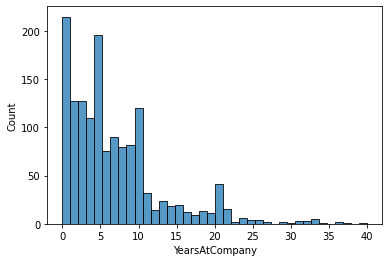

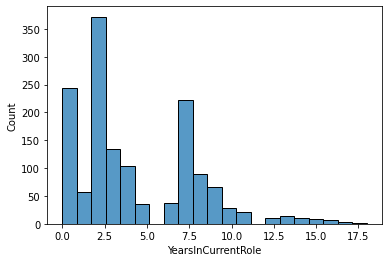

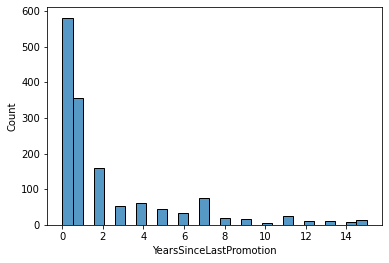

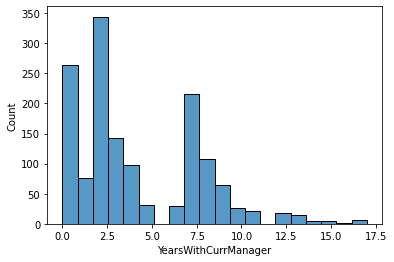

In [ ]:
for column in df_HR.columns:
    sns.histplot(x= column,data = df_HR)
    plt.show()

## 4.6. Limpieza y Transformación de datos

In [ ]:
df_HR.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace= True)

In [ ]:
df_HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df_HR['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df_HR_KMeans = df_HR.copy()

df_HR_KMeans['Attrition'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_KMeans = df_HR_KMeans[df_HR_KMeans['Attrition']== 0]
df_HR_KMeans.drop(columns=['Attrition'],inplace = True)
df_HR_KMeans['Education'].replace(['No','Yes',],[0, 1], inplace=True)
df_HR_KMeans['BusinessTravel'].replace([ 'Non-Travel','Travel_Rarely', 'Travel_Frequently'],[0, 1,2], inplace=True)
df_HR_KMeans['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df_HR_KMeans['OverTime'].replace(['Yes', 'No'],[1, 0], inplace=True)

In [ ]:
df_HR_KMeans.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,2,279,Research & Development,8,1,Life Sciences,2,3,1,...,4,4,1,10,3,3,10,7,1,7
3,33,2,1392,Research & Development,3,4,Life Sciences,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,1,591,Research & Development,2,1,Medical,7,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,2,1005,Research & Development,2,2,Life Sciences,8,4,1,...,3,3,0,8,2,2,7,7,3,6
6,59,1,1324,Research & Development,3,3,Medical,10,3,0,...,4,1,3,12,3,2,1,0,0,0


In [ ]:
df_HR_dummies = pd.get_dummies(df_HR_KMeans[['Department','EducationField','JobRole','MaritalStatus']])
df_HR_KMeans = pd.concat([df_HR_KMeans,df_HR_dummies],axis=1)
df_HR_KMeans.drop(columns = ['Department','EducationField','JobRole','MaritalStatus'],inplace=True)


for column in df_HR_KMeans.columns:
    scaler = MinMaxScaler()
    df_HR_KMeans[column] = scaler.fit_transform(df_HR_KMeans[column].values.reshape(-1,1))
df_HR_KMeans.head(5)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1,0.738095,1.0,0.126700,0.250000,0.00,0.000000,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.357143,1.0,0.923407,0.071429,0.75,0.001452,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.5,0.350036,0.035714,0.00,0.002420,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.333333,1.0,0.646385,0.035714,0.25,0.002904,1.000000,1.0,0.700000,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.976190,0.5,0.874732,0.071429,0.50,0.003872,0.666667,0.0,0.728571,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4.7. Machine Learning


### 4.7.1. Aprendizaje No Supervisado



Se utiliza cuando deseamos aprender la estructura inherente de nuestros datos sin usar etiquetas proporcionadas explícitamente. Es muy útil en el análisis exploratorio porque puede identificar automáticamente la estructura de los datos.
<figure>
<img src="/work/Modulo3_Caso4/fig/unsupervised_learning.png" align="center"/> 
</figure> 


https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d

#### 4.7.1.1. Algoritmos de Agrupación: K-Medias



El objetivo de K-means es simple: agrupar puntos de datos similares y descubrir patrones subyacentes. Para lograr este objetivo, K-means busca un número fijo (k) de clústeres en un dataset.

<figure>
<img src="/work/Modulo3_Caso4/fig/K-means clustering.png" align="center"/> 
</figure> 

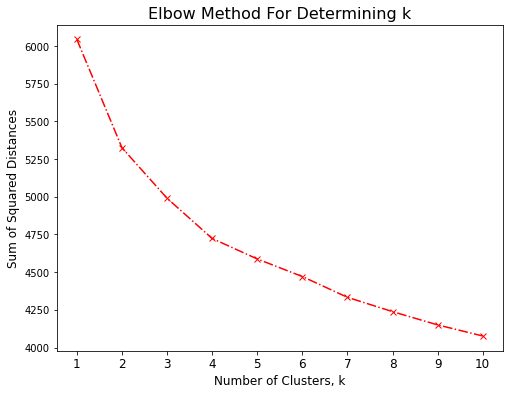

In [ ]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_HR_KMeans)
    sum_sq_d.append(km.inertia_)
    
plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()

In [ ]:
k = 2

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_HR_KMeans)
labels = kmeans.predict(df_HR_KMeans)

df_HR_KMeans['labels']=labels

df_HR_KMeans_grouped = df_HR_KMeans.groupby(['labels']).mean()
df_HR_KMeans_grouped.head(5)

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
labels,,,,,,,,,,,,,,,,,,,,,
0,0.480203,0.529412,0.525772,0.286396,0.474563,0.498189,0.590355,0.623211,0.521667,0.596184,...,0.222576,0.076312,0.152623,0.095390,0.263911,0.000000,0.000000,0.344992,0.655008,0.00000
1,0.450686,0.527318,0.490703,0.278855,0.489238,0.494629,0.590508,0.562914,0.505203,0.583885,...,0.094371,0.081126,0.064570,0.029801,0.130795,0.445364,0.082781,0.127483,0.293046,0.57947


<AxesSubplot:ylabel='labels'>

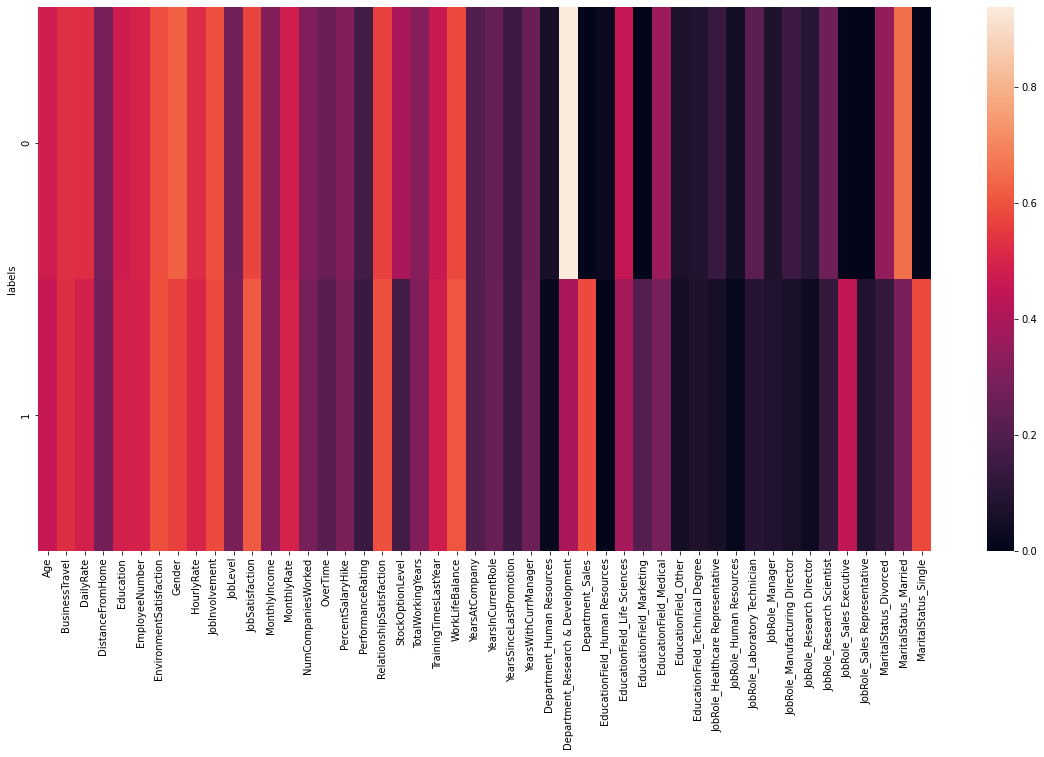

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_HR_KMeans_grouped)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6bb6c849-6b4b-49a2-8775-80ecb8e8b9b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>